In [1]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

In [2]:
df= pd.read_csv("lingustic_quality_inter.csv")

In [3]:
df1= df.copy()

In [4]:
df1

,index,log_messages,log_level,label,lemmas,pos,tag,dep,alpha,stop
0,7118,opening * *,info,0.0,open * *,VERB PUNCT PUNCT,VBG NFP NFP,ROOT punct punct,1,0
1,7133,initializing * *,info,0.0,initialize * *,VERB PUNCT PUNCT,VBG NFP NFP,ROOT punct punct,1,0
2,7611,moved * *,info,0.0,move * *,VERB PUNCT PUNCT,VBN NFP NFP,ROOT punct punct,1,0
3,7801,renamed * *,info,0.0,rename * *,VERB PUNCT PUNCT,VBN NFP NFP,ROOT punct punct,1,0
4,8392,bypassed * *,info,0.0,bypass * *,VERB PUNCT PUNCT,VBN NFP NFP,ROOT punct punct,1,0
...,...,...,...,...,...,...,...,...,...,...
2409,10315,wait for rolling restart,info,0.0,wait for rolling restart,VERB ADP NOUN NOUN,VB IN NN NN,ROOT prep amod pobj,4,1
2410,10317,wait for rolling restart,info,0.0,wait for rolling restart,VERB ADP NOUN NOUN,VB IN NN NN,ROOT prep amod pobj,4,1
2411,10318,wait for rolling restart,info,0.0,wait for rolling restart,VERB ADP NOUN NOUN,VB IN NN NN,ROOT prep amod pobj,4,1
2412,10320,wait for rolling restart,info,0.0,wait for rolling restart,VERB ADP NOUN NOUN,VB IN NN NN,ROOT prep amod pobj,4,1


In [5]:
df1.describe()

,index,label,alpha,stop
count,2414.000000,2414.000000,2414.000000,2414.000000
mean,7414.997929,0.285418,2.712925,0.218724
std,2941.310109,0.451707,1.184241,0.502177
min,1590.000000,0.000000,0.000000,0.000000
25%,7135.500000,0.000000,2.000000,0.000000
50%,8297.000000,0.000000,3.000000,0.000000
75%,9477.750000,1.000000,3.000000,0.000000
max,11059.000000,1.000000,10.000000,4.000000


In [6]:
print(df1.columns)

Index(['index', 'log_messages', 'log_level', 'label', 'lemmas', 'pos', 'tag',
       'dep', 'alpha', 'stop'],
      dtype='object')


In [7]:
df1 = df1.drop(['label', 'lemmas', 'pos', 'tag', 'dep', 'alpha', 'stop'], axis=1)

In [8]:
df1

,index,log_messages,log_level
0,7118,opening * *,info
1,7133,initializing * *,info
2,7611,moved * *,info
3,7801,renamed * *,info
4,8392,bypassed * *,info
...,...,...,...
2409,10315,wait for rolling restart,info
2410,10317,wait for rolling restart,info
2411,10318,wait for rolling restart,info
2412,10320,wait for rolling restart,info


In [9]:
# Remove the star sign (*) from the 'log_messages' column
df1['log_messages'] = df1['log_messages'].str.replace('*', '')


In [10]:
df1

,index,log_messages,log_level
0,7118,opening,info
1,7133,initializing,info
2,7611,moved,info
3,7801,renamed,info
4,8392,bypassed,info
...,...,...,...
2409,10315,wait for rolling restart,info
2410,10317,wait for rolling restart,info
2411,10318,wait for rolling restart,info
2412,10320,wait for rolling restart,info


In [11]:
# Group the data by 'log_level' and count the occurrences of each level
log_level_counts = df1['log_level'].value_counts()

In [12]:
print(log_level_counts)

log_level
info     1873
error     541
Name: count, dtype: int64


In [13]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\socce\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
# Tokenize the log messages
df1['tokenized_log_messages'] = df1['log_messages'].apply(word_tokenize)

In [15]:
df1

,index,log_messages,log_level,tokenized_log_messages
0,7118,opening,info,[opening]
1,7133,initializing,info,[initializing]
2,7611,moved,info,[moved]
3,7801,renamed,info,[renamed]
4,8392,bypassed,info,[bypassed]
...,...,...,...,...
2409,10315,wait for rolling restart,info,"[wait, for, rolling, restart]"
2410,10317,wait for rolling restart,info,"[wait, for, rolling, restart]"
2411,10318,wait for rolling restart,info,"[wait, for, rolling, restart]"
2412,10320,wait for rolling restart,info,"[wait, for, rolling, restart]"


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
# Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(df1['log_messages'])

In [18]:
# Label encoding
df1['log_level'] = df1['log_level'].map({'info': 0, 'error': 1})
y = df['log_level']

In [19]:
df1

,index,log_messages,log_level,tokenized_log_messages
0,7118,opening,0,[opening]
1,7133,initializing,0,[initializing]
2,7611,moved,0,[moved]
3,7801,renamed,0,[renamed]
4,8392,bypassed,0,[bypassed]
...,...,...,...,...
2409,10315,wait for rolling restart,0,"[wait, for, rolling, restart]"
2410,10317,wait for rolling restart,0,"[wait, for, rolling, restart]"
2411,10318,wait for rolling restart,0,"[wait, for, rolling, restart]"
2412,10320,wait for rolling restart,0,"[wait, for, rolling, restart]"


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
model=RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [24]:

y_pred = model.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score, classification_report

In [26]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [27]:
print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.9585921325051759
              precision    recall  f1-score   support

       error       0.93      0.89      0.91       112
        info       0.97      0.98      0.97       371

    accuracy                           0.96       483
   macro avg       0.95      0.94      0.94       483
weighted avg       0.96      0.96      0.96       483



done
done
['info' 'info' 'info' 'info' 'error' 'info' 'info' 'info' 'info']
Accuracy: 0.56
Precision: 0.50
Recall: 1.00
F1 Score: 0.67
Confusion Matrix:
[[1 4]
 [0 4]]


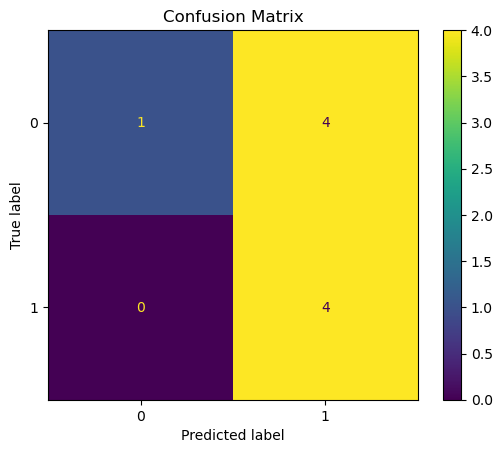

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix#, plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Referred to https://learn.microsoft.com/en-us/previous-versions/windows/desktop/bb226812(v=vs.85) to construct representative log messages.
messages = ["Out of memory", "File format does not match required format","Near memory limit", "Program crashed when loading file", "File not found", "Could not complete operation index out of bounds.", "File Transfer Complete", "File loaded", "Timeout system connection could not be established"]
#The codding for the log messages is: {INFO: 1, ERROR:0}.
true_labels = [0,0,1,1,0,0,1,1,0]
    
# Feature extraction using TF-IDF

message_Vect = tfidf_vectorizer.transform(messages)

predicted_labels = model.predict(message_Vect)
predicted_lables_bin = []
for i in predicted_labels:
    if i=='info':
        predicted_lables_bin.append(1)
    else:
        predicted_lables_bin.append(0)
    
print('done')
#Calculates accuracy
accuracy = accuracy_score(true_labels,predicted_lables_bin)
print(predicted_labels)
# Calculate precision, recall, and F1 score
precision = precision_score(true_labels,predicted_lables_bin)
recall = recall_score(true_labels, predicted_lables_bin)
f1 = f1_score(true_labels, predicted_lables_bin)

# Calculate confusion matrix
confusion = confusion_matrix(true_labels, predicted_lables_bin)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(confusion)

import matplotlib.pyplot as plt
cm = confusion_matrix(true_labels, predicted_lables_bin)
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['0', '1'])
cmd_obj.plot()
cmd_obj.ax_.set(title='Confusion Matrix')
plt.show()